In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Методы численного интегрирования: трапеций, прямоугольников, Симспона

In [3]:
def trapez(f, a, b, n):
    h = (b - a) / n                                             # шаг разбиения
    x = [a + i * h for i in range(n + 1)]                       # отсчеты
    y = [f(x_i) for x_i in x]                                   # значения функции в узлах

    result = (y[0] + 2*sum(y[1:-1]) + y[-1]) / 2 * h            # вычисление интеграла
    return result


def rectang(f, a, b, n, method='left'):

    h = (b - a) / n                            # шаг разбиения
    x = [a + i * h for i in range(n + 1)]      # отсчеты

    if method == 'left':                       # значения функции в узлах
        y = [f(x_i) for x_i in x[:-1]]
    elif method == 'right':
        y = [f(x_i) for x_i in x[1:]]
    elif method == 'midpoint':
        y = [f(x_i + h / 2) for x_i in x[:-1]]

    result = sum(y) * h                        # вычисление интеграла
    return result


def simpson(f, a, b, n):

    assert n%2 == 0, "Нечетное число интервалов"

    h = (b - a) / n                            # шаг разбиения
    x = [a + i * h for i in range(n + 1)]      # отсчеты
    y = [f(x_i) for x_i in x]                  # значения функции в узлах

    result = (y[0] + 4 * sum(y[1:-1:2]) + 2 * sum(y[2:-1:2]) + y[-1]) / 3 * h
    return result



#### Проверка численного интегрирования

In [4]:
def f(x):
    return np.sin(x)

a = 0
b = np.pi
n = 100

res_trap = trapez(f, a, b, n)
res_req_left = rectang(f, a, b, n, method='left')
res_req_right = rectang(f, a, b, n, method='right')
res_req_midpoint = rectang(f, a, b, n, method='midpoint')
res_sim = simpson(f, a, b, n)

print("Левая точка:", res_req_left)
print("Правая точка:", res_req_right)
print("Средняя точка:", res_req_midpoint)
print("Трапеция:", res_trap)
print("Симпсон:", res_sim)


Левая точка: 1.9998355038874436
Правая точка: 1.9998355038874436
Средняя точка: 2.0000822490709864
Трапеция: 1.9998355038874436
Симпсон: 2.000000010824504


#### Ошибка интегрирования от мелкости разбиения

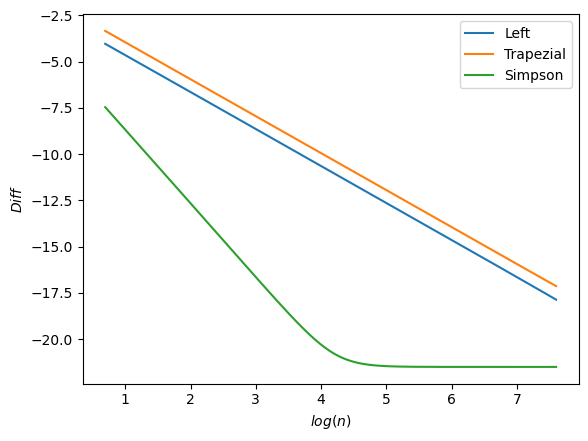

In [43]:
def f(x):
    return np.exp(x)

a = 0
b = 1
integral = 1.718281828
n = np.logspace(0, 3, num=1000, base=10, dtype=np.int32)*2
# n = np.logspace(1, 1000, 1000, dtype=np.int32) * 2
res_left = [rectang(f, a, b, n_i, method='midpoint') for n_i in n]
res_trap = [trapez(f, a, b, n_i) for n_i in n]
res_simp = [simpson(f, a, b, n_i) for n_i in n]

dy_left = [abs(integral - res_i) for res_i in res_left]
dy_trap = [abs(integral - res_i) for res_i in res_trap]
dy_simp = [abs(integral - res_i) for res_i in res_simp]

plt.plot(np.log(n), np.log(dy_left), label="Left")
plt.plot(np.log(n), np.log(dy_trap), label="Trapezial")
plt.plot(np.log(n), np.log(dy_simp), label="Simpson")
plt.xlabel('$log(n)$')
plt.legend()
plt.ylabel('$Diff$')
plt.show()


In [44]:
from scipy.stats import linregress

In [46]:
slope_left, *a = linregress(np.log(n[:500]), np.log(dy_left[:500]))
slope_trapez, *a = linregress(np.log(n[:500]), np.log(dy_trap[:500]))
slope_simpson, *a = linregress(np.log(n[:400]), np.log(dy_simp[:400]))

print(f"Порядок:\nЛевых прямоугольников - {abs(slope_left)}\nТрапеций - {abs(slope_trapez)}\nСимпсона - {abs(slope_simpson)}\n")

Порядок:
Левых прямоугольников - 1.9979193333864476
Трапеций - 1.9988078990155784
Симпсона - 3.9826680639492005



#### Правило Рунге оценки погрешности

In [6]:
def runge_rule(f, a, b, n1, n2):
    In = simpson(f, a, b, n1)
    I2n = simpson(f, a, b, n2)
    R = abs(I2n - In) / (2**4 - 1)   # theta = 2^4 - 1, для метода Симпсона

    return I2n, R


def f(x):
    return np.sin(x)

a = 0
b = np.pi
n1 = 10
n2 = 20

res, delta = runge_rule(f, a, b, n1, n2)

print(f"Оценка интеграла с использованием правила Рунге: {res}; разница с истинным:{delta}")

Оценка интеграла с использованием правила Рунге: 2.0000067844418012; разница с истинным:6.8488582135373125e-06
